In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_details=pd.read_csv("House_Price.csv")

In [3]:
house_details.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1,1180,5650,1,221900
1,3,2,2570,7242,2,538000
2,2,1,770,10000,1,180000
3,4,3,1960,5000,1,604000
4,3,2,1680,8080,1,510000
5,4,5,5420,101930,1,1225000
6,3,2,1715,6819,2,257500
7,3,2,1060,9711,1,291850
8,3,1,1780,7470,1,229500
9,3,3,1890,6560,2,323000


In [4]:
house_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   bedrooms     21613 non-null  int64
 1   bathrooms    21613 non-null  int64
 2   sqft_living  21613 non-null  int64
 3   sqft_lot     21613 non-null  int64
 4   floors       21613 non-null  int64
 5   price        21613 non-null  int64
dtypes: int64(6)
memory usage: 1013.2 KB


In [5]:
house_details.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,2.161300e+04
mean,3.370842,2.312543,2079.899736,1.510697e+04,1.542405,5.400881e+05
std,0.930062,0.865405,918.440897,4.142051e+04,0.567504,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,7.500000e+04
25%,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,3.219500e+05
50%,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,4.500000e+05
75%,4.000000,3.000000,2550.000000,1.068800e+04,2.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,7.700000e+06


In [6]:
house_details.isnull().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
price          0
dtype: int64

In [7]:
house_info=house_details.corr().round(2)
house_info

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
bedrooms,1.00,0.49,0.58,0.03,0.18,0.31
bathrooms,0.49,1.00,0.72,0.08,0.45,0.48
sqft_living,0.58,0.72,1.00,0.17,0.33,0.70
sqft_lot,0.03,0.08,0.17,1.00,-0.00,0.09
floors,0.18,0.45,0.33,-0.00,1.00,0.26
price,0.31,0.48,0.70,0.09,0.26,1.00


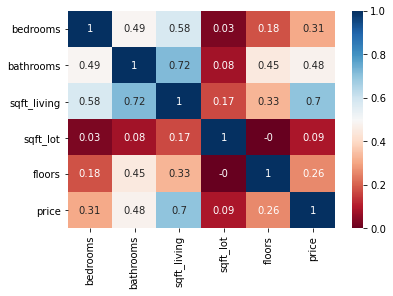

In [8]:
sns.heatmap(house_info,annot=True,cmap='RdBu'); 

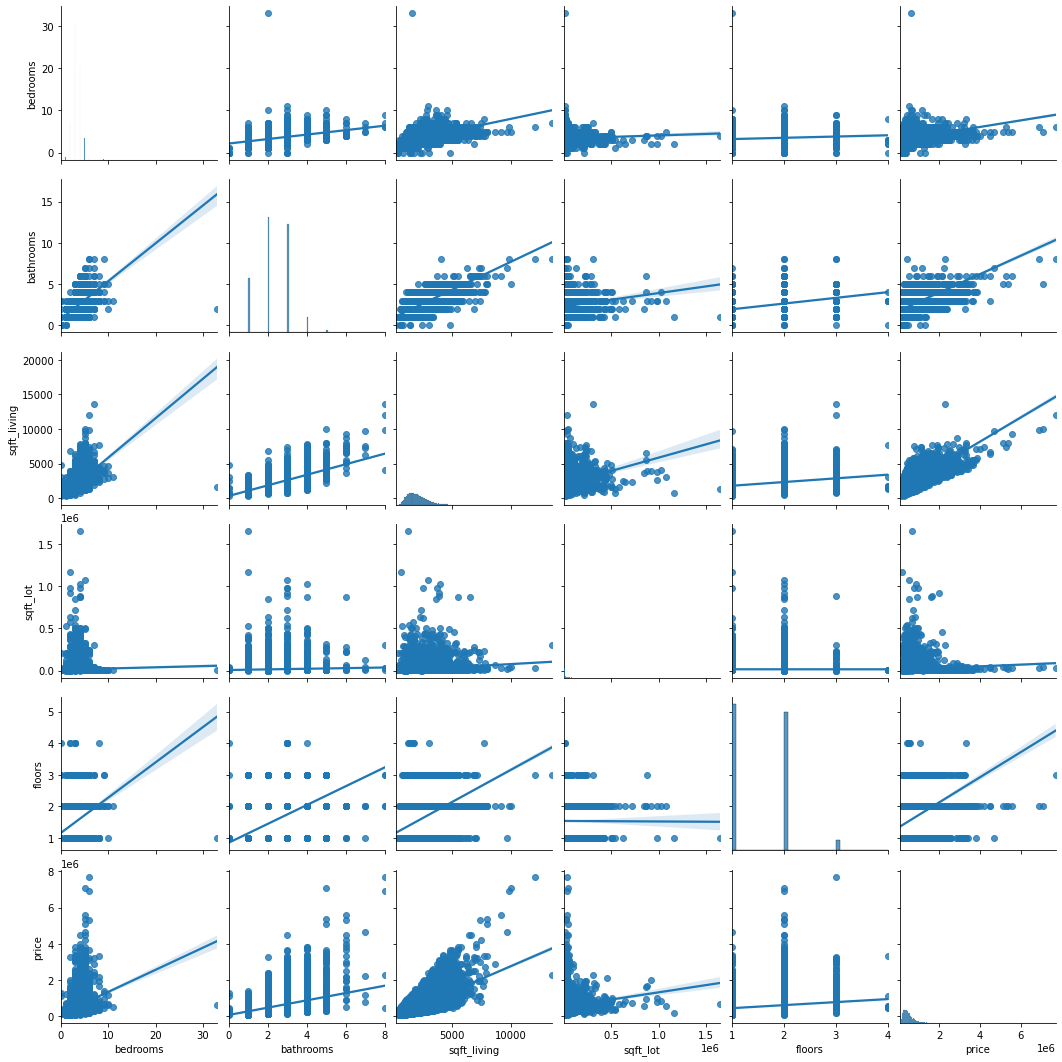

In [54]:
sns.pairplot(house_details,kind="reg"); #By seeing this pairplot we can say,sqft_living has high correlation with price(dependent variable)

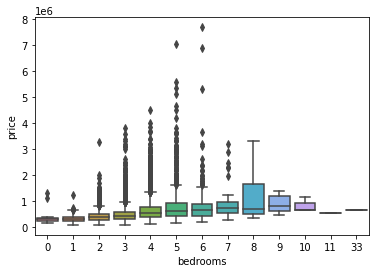

In [10]:
sns.boxplot(x="bedrooms",y="price",data=house_details); 

# from boxplot it seems price deflections(outliers) are high where houses have 4,5 and 6 bedrooms.

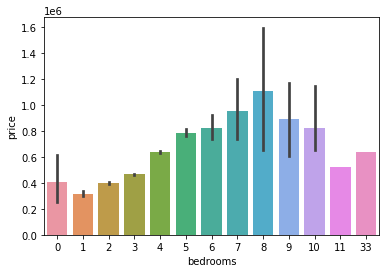

In [11]:
sns.barplot(x="bedrooms",y="price",data=house_details);

# from barplot we conclude house with 8 bedrooms have high price

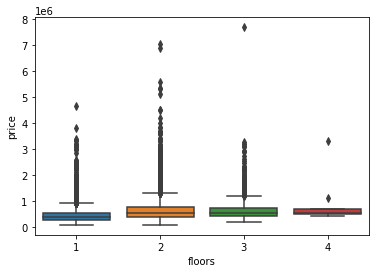

In [12]:
sns.boxplot(x="floors",y="price",data=house_details);

<AxesSubplot:xlabel='price'>

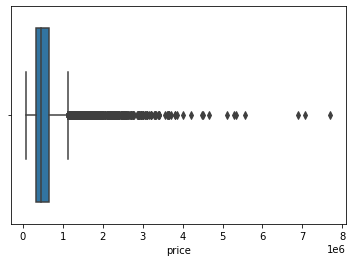

In [13]:
sns.boxplot(x="price",data=house_details)

<AxesSubplot:>

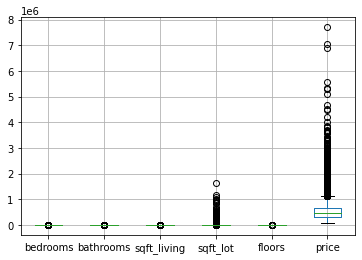

In [14]:
house_details.boxplot()

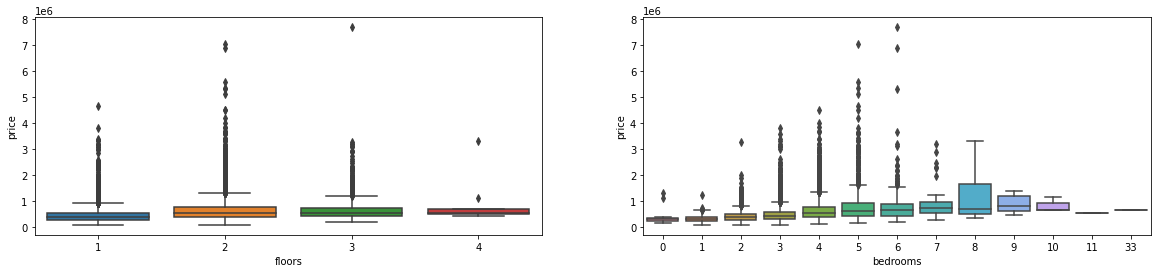

In [15]:
f,axes=plt.subplots(nrows=1, ncols=2,figsize=(20,4))
sns.boxplot(x="floors",y="price",data=house_details,ax=axes[0]);
sns.boxplot(x="bedrooms",y="price",data=house_details,ax=axes[1]); 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

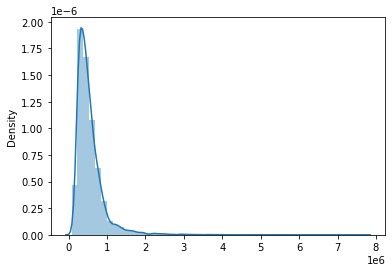

In [16]:
sns.distplot(x=house_details["price"])

# price deflection are high in houses having 2 floors

In [17]:
ss=pd.DataFrame(house_details)
ss

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1,1180,5650,1,221900
1,3,2,2570,7242,2,538000
2,2,1,770,10000,1,180000
3,4,3,1960,5000,1,604000
4,3,2,1680,8080,1,510000
...,...,...,...,...,...,...
21608,3,3,1530,1131,3,360000
21609,4,3,2310,5813,2,400000
21610,2,1,1020,1350,2,402101
21611,3,3,1600,2388,2,400000


# just found the max price

In [18]:
column = ss["price"]
max_value = column.max() 
print(max_value)

7700000


In [19]:
ss[ss['price']==ss['price'].max()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
7252,6,8,12050,27600,3,7700000


# seperating dependent and independent variables
                    

In [20]:
y_dep=house_details.price
y_dep      

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

In [21]:
x_indep=house_details.drop("price",axis=1) #DROPING THE DEPENDENT VARIABLE
x_indep

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,3,1,1180,5650,1
1,3,2,2570,7242,2
2,2,1,770,10000,1
3,4,3,1960,5000,1
4,3,2,1680,8080,1
...,...,...,...,...,...
21608,3,3,1530,1131,3
21609,4,3,2310,5813,2
21610,2,1,1020,1350,2
21611,3,3,1600,2388,2


# CHECKING  p-value

In [22]:
import statsmodels.api as sm

In [23]:
model=sm.OLS(y_dep,x_indep)

In [24]:
my_fit=model.fit()

In [25]:
my_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                          2.352e+04
Date:                Fri, 17 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:21:40   Log-Likelihood:                     -2.9992e+05
No. Observations:               21613   AIC:                                  5.999e+05
Df Residuals:                   21608   BIC:                                  5.999e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -4.195e+04   1798.147    -23.329      0.000   -4.55e+04   -3.84e+04
bathrooms   -2.337e+04   3106.713     -7.524      0.000   -2.95e+04   -1.73e+04
sqft_living   324.7097      2.975    109.141      0.000     318.878     330.541
sqft_lot       -0.3486      0.043     -8.103      0.000      -0.433      -0.264
floors       4.002e+04   3138.743     12.750      0.000    3.39e+04    4.62e+04
==============================================================================
Omnibus:                    13945.067   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457933.849
Skew:                           2.609   Prob(JB):                         0.00
Kurtosis:                      24.938   Cond. No.                     9.37e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# From summary we conclude,R-square value is 0.8 so correlation is high and none of the independent variables have p>0.05 so all the independent variables have high correlation with dependent variable.

# PREDICTION

In [26]:
my_fit.predict(x_indep).round()


0        271987.0
1        739423.0
2        179288.0
3        436790.0
4        410120.0
           ...   
21608    420501.0
21609    590174.0
21610    303501.0
21611    402773.0
21612    303596.0
Length: 21613, dtype: float64

# here python predicted the price of each houses

In [27]:
my_fit.predict(x_indep).round().head(10)

0     271987.0
1     739423.0
2     179288.0
3     436790.0
4     410120.0
5    1479743.0
6     461944.0
7     208232.0
8     466178.0
9     495484.0
dtype: float64

# MACHINE LEARNING

#Machine learning is performed to check whether the predicted values are correct or not.

In [28]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# splitting 100%  data into 80% of data for fitting and 20% for prediction

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_indep,y_dep,train_size=0.8,random_state=1)

In [30]:
my_data=sm.OLS(y_train,x_train)

In [31]:
my_fit1=my_data.fit()

# just checking the R-sq and p values of 80% of data

In [32]:
my_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          1.963e+04
Date:                Fri, 17 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:21:41   Log-Likelihood:                     -2.3938e+05
No. Observations:               17290   AIC:                                  4.788e+05
Df Residuals:                   17285   BIC:                                  4.788e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -3.773e+04   1942.300    -19.427      0.000   -4.15e+04   -3.39e+04
bathrooms    -2.63e+04   3383.120     -7.773      0.000   -3.29e+04   -1.97e+04
sqft_living   317.3245      3.278     96.810      0.000     310.900     323.749
sqft_lot       -0.3065      0.045     -6.808      0.000      -0.395      -0.218
floors       4.419e+04   3404.985     12.979      0.000    3.75e+04    5.09e+04
==============================================================================
Omnibus:                     9379.778   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165630.922
Skew:                           2.220   Prob(JB):                         0.00
Kurtosis:                      17.498   Cond. No.                     9.72e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
7291,3,2,2190,7021,1
14835,3,3,2370,6840,2
15880,2,1,1230,3800,1
8812,4,2,2510,9963,1
17220,3,1,1160,7491,1
...,...,...,...,...,...
10955,3,3,1920,3867,2
17289,4,5,3420,7440,3
5192,3,2,1970,54450,1
12172,3,2,1980,8775,1


In [34]:
y_train

7291      353000
14835     300523
15880     435000
8812      800000
17220     417500
          ...   
10955     571000
17289    1350000
5192      650000
12172     437000
235      1025000
Name: price, Length: 17290, dtype: int64

# IMPORTING LINEAR REGRESSION

In [35]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [36]:
data=LinearRegression()

In [37]:
data.fit(x_train,y_train)

LinearRegression()

# predicting price with 20% of the independent variables(x_test)

In [38]:
y_pred=data.predict(x_test)
y_pred

array([ 731166.67967974,  409898.60570831,  669252.27860429, ...,
        478178.67569015, 1472510.04262538,  363850.457691  ])

In [39]:
comp=pd.DataFrame({"actual_price":y_test,"machine_pred_price":y_pred}) #giving column names 
comp

,actual_price,machine_pred_price
15544,459000,7.311667e+05
17454,445000,4.098986e+05
21548,1057000,6.692523e+05
3427,732350,5.637444e+05
8809,235000,4.046212e+05
...,...,...
13597,965000,9.325628e+05
9648,359950,5.967553e+05
18627,260000,4.781787e+05
9553,1795000,1.472510e+06


# Finding residual(error) by taking difference from machine calculated value to actual calculated value. 


In [40]:
res=y_pred-y_test
res.round()

15544    272167.0
17454    -35101.0
21548   -387748.0
3427    -168606.0
8809     169621.0
           ...   
13597    -32437.0
9648     236805.0
18627    218179.0
9553    -322490.0
14200    -54150.0
Name: price, Length: 4323, dtype: float64

# here are the errors or differences from machine calc and actual calc

# GRAPHS

In [41]:
com_lmt=comp.head(25)

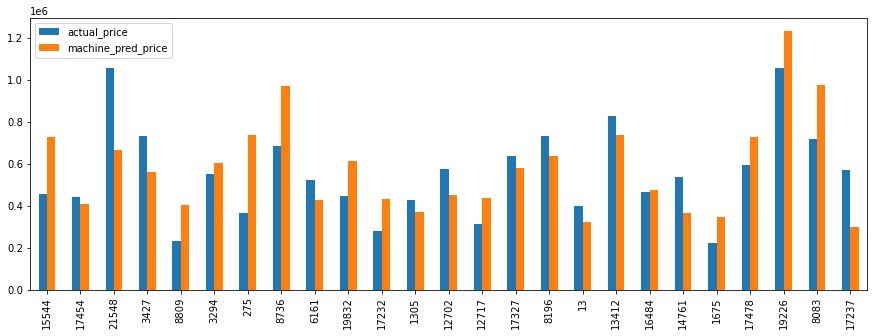

In [42]:
com_lmt.plot(kind="bar",figsize=(15,5));

# There is only minimum difference b/w actual and predicted values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


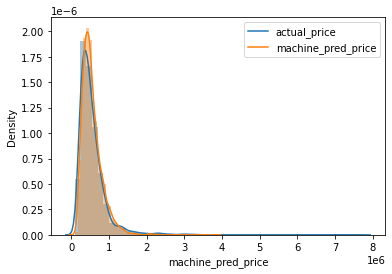

In [43]:
sns.distplot(comp["actual_price"])
sns.distplot(comp["machine_pred_price"])
plt.legend(["actual_price","machine_pred_price"])

# from this graph we can see that both the bell curves are nearer to each other,there is only less variation b/w both values

# ASSUMPTIONS IN LINEAR REGRESSION

((array([-3.59801667, -3.36038867, -3.22930113, ...,  3.22930113,
          3.36038867,  3.59801667]),
  array([-4221931.46193083, -4132071.6104107 , -4123216.48079273, ...,
           965453.51862481,  1002997.08966016,  1530206.98421065])),
 (249171.33518121368, -3865.5587791720936, 0.8659735742459718))

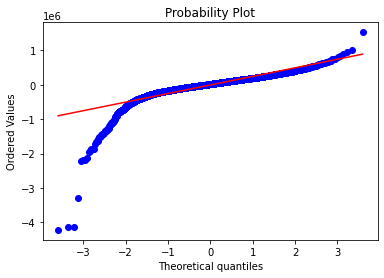

In [44]:
# NORMALITY CHECK
import scipy.stats as sps
sps.probplot(res,dist="norm",plot=plt)

# Finally i conclude most of the errors are equal to 1 and near by 1 so the predicted values can be taken into account.The predicted dependent variables values are good 

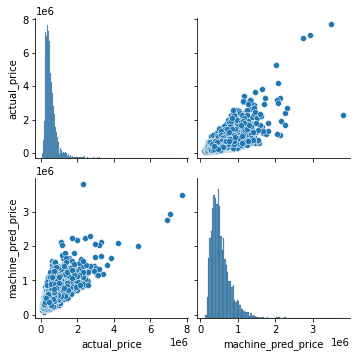

In [45]:
sns.pairplot(comp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

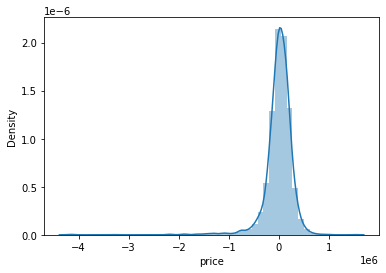

In [46]:
sns.distplot(res)

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

82680872234.52504

In [48]:
mse = np.mean((y_test - y_pred)**2)
mse

82680872234.525

In [49]:
rmse= mean_squared_error(y_test,[0 for _ in y_test], squared=False)
rmse

688412.0089742545

# Below are just for practice

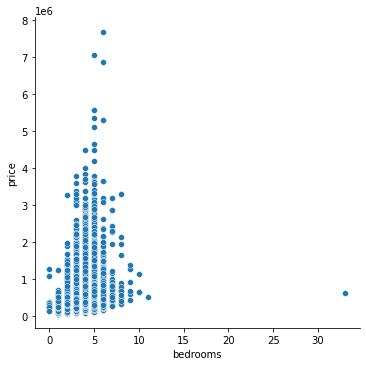

In [50]:
sns.relplot(x="bedrooms",y="price",data=house_details)

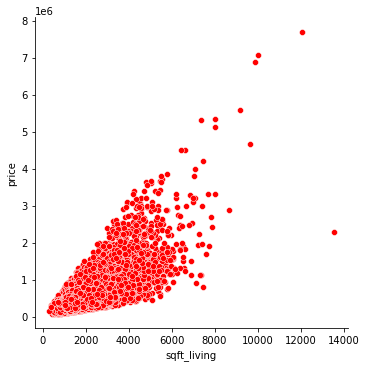

In [51]:
sns.relplot(x="sqft_living",y="price",color="red",data=house_details)

AttributeError: 'Rectangle' object has no property 'kind'

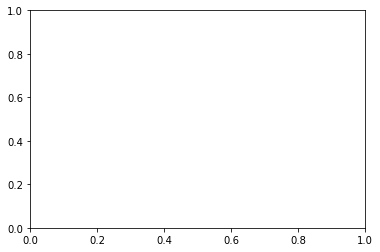

In [52]:
sns.barplot(x="bedrooms",y="price",kind="violin",data=house_details);

In [ ]:
plt.scatter(x="sqft_living",y="price",color="red",data=house_details);

In [ ]:
plt.xlabel("actual_price")
plt.ylabel("machine_pred_price")
plt.scatter(comp.actual_price,comp.machine_pred_price)

In [ ]:
y_pred.intercept_

In [ ]:
sns.distplot(house_details)

In [ ]:
k=x_test.bedrooms


In [ ]:
plt.scatter(k,y_test)
plt.plot(k,y_test, color='red')
plt.show()

In [ ]:
plt.plot(x="bedrooms" , y="sqft_living", color='red')